### Project: Customer Segmentation
#### This is an Unsupervised Learning problem statement
Dataset used is available along with its details at https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data = pd.read_csv('Mall_Customers.csv')
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Perform basic EDA

In [3]:
df_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Observation:
No null values

In [6]:
df_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Observation:
CustomerID is similar to index and not giving any extra information, it can be dropped

In [7]:
df_data.drop('CustomerID', axis=1, inplace=True)
df_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
# Renaming the columns to make it easy to use
df_data.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'}, inplace=True)

#### Plot all features and see the distribution of customers

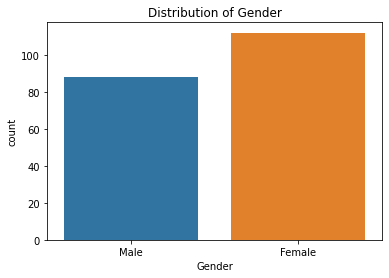

In [9]:
sns.countplot(x='Gender', data=df_data)
plt.title('Distribution of Gender')
plt.show()

#### Observation:
There are more Female customers than Male Customers in the dataset, but it is not imbalanced.

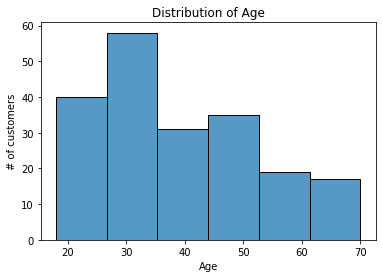

In [10]:
sns.histplot(x='Age', data=df_data, bins=6)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('# of customers')
plt.show()

#### Observation:
Maximum Customers belong to the Age Group 26-35

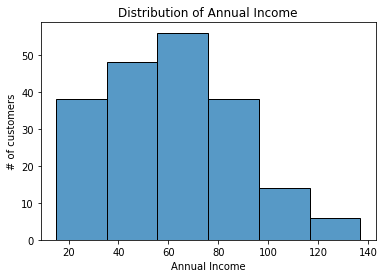

In [11]:
sns.histplot(x='AnnualIncome', data=df_data, bins=6)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('# of customers')
plt.show()

#### Observation:
Maximum Customers have annual income between 55k to 75k$

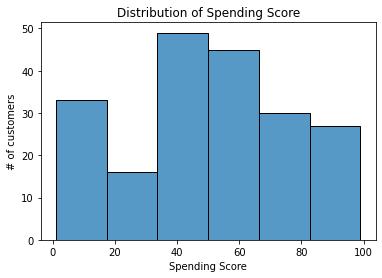

In [12]:
sns.histplot(x='SpendingScore', data=df_data,bins=6)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('# of customers')
plt.show()

#### Observation:
Maximum Customers have a spending score around 35-65

#### Look for pair wise relationships

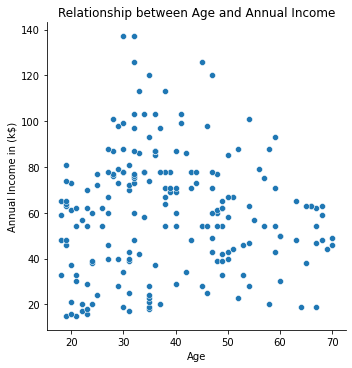

In [13]:
sns.relplot(x='Age', y='AnnualIncome', data=df_data)
plt.title('Relationship between Age and Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income in (k$)')
plt.show()

#### Observation:
Data points are distributed with no concentrated regions

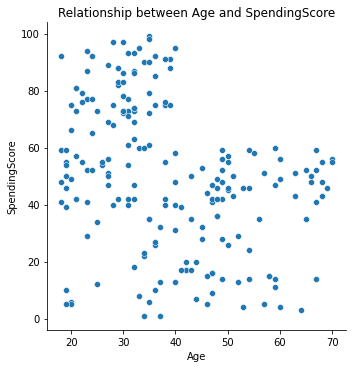

In [14]:
sns.relplot(x='Age', y='SpendingScore', data=df_data)
plt.title('Relationship between Age and SpendingScore')
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.show()

#### Observation:
Some concentraion of data points is seen with people <40 year having higher Spending score

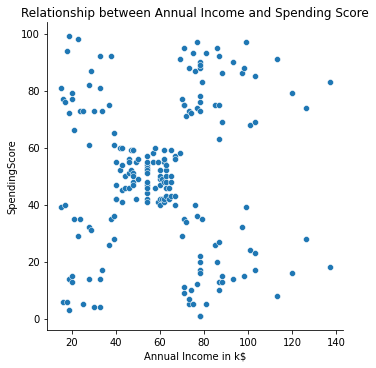

In [15]:
sns.relplot(x='AnnualIncome', y='SpendingScore', data=df_data)
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income in k$')
plt.ylabel('SpendingScore')
plt.show()

#### Observation:
Clusters can be seen to form in this relationship. 5 clusters seem to exists.

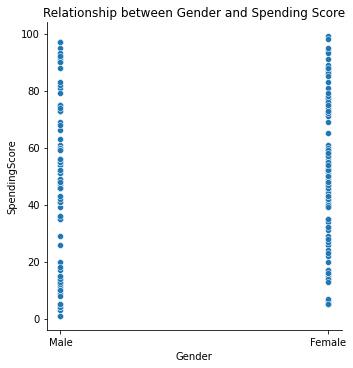

In [16]:
sns.relplot(x='Gender', y='SpendingScore', data=df_data)
plt.title('Relationship between Gender and Spending Score')
plt.xlabel('Gender')
plt.ylabel('SpendingScore')
plt.show()

#### Observation:
No clear clusters are seen with gender feature.

### Using Unsupervised Learning
Based on the above plots there seems to be clusters with Age and SpendingScore and with SpendingScore and AnnualIncome.

Try performing k-Means clustering for both and see the results.

Metric to be used: wcss (Within cluster Sum of Squared distance)

In [17]:
from sklearn.cluster import KMeans

1) Age and SpendingScore as X

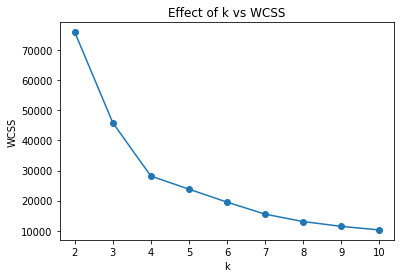

In [18]:
X=df_data[['Age','SpendingScore']]

# finding the right value of k, using elbow curve
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Effect of k vs WCSS')
plt.show()


#### Observation:
k value of 4,5 is where we see the elbow forming.
Lets try with 5 clusters

In [19]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X)
cluster_centroids = kmeans.cluster_centers_
print(cluster_centroids)

[[44.70588235 38.76470588]
 [30.1754386  82.35087719]
 [60.36666667 51.16666667]
 [25.775      50.775     ]
 [43.28205128 11.84615385]]


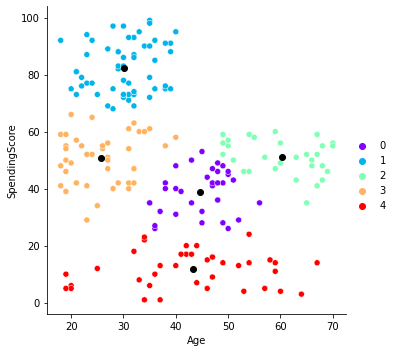

In [20]:
sns.relplot(x='Age',y='SpendingScore',hue=labels, palette='rainbow', data=X)
plt.scatter(cluster_centroids[:,0],cluster_centroids[:,1], color='black')
plt.show()

#### Observation
Looks like the cluster with label of 4 is too broad

2) AnnualIncome and SpendingScore as X

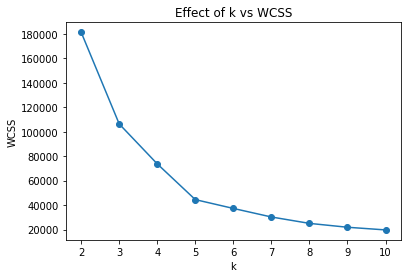

In [21]:
X=df_data[['AnnualIncome','SpendingScore']]

# finding the right value of k, using elbow curve
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Effect of k vs WCSS')
plt.show()


#### Observation:
k value of 5 is where we see the elbow forming.
So k=5

In [22]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X)
cluster_centroids = kmeans.cluster_centers_
print(cluster_centroids)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


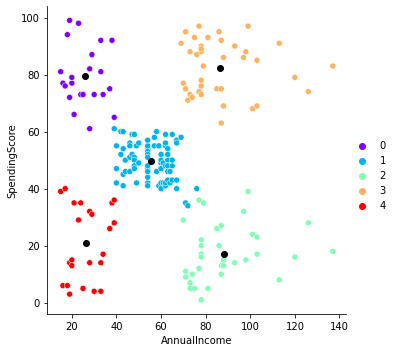

In [23]:
sns.relplot(x='AnnualIncome',y='SpendingScore',hue=labels, palette='rainbow', data=X)
plt.scatter(cluster_centroids[:,0],cluster_centroids[:,1], color='black')
plt.show()

### Observation:
Based on the two cluster plots the clusters formed using AnnualIncome and SpendingScore as input features has well formed clusters. 

### Conclusion:
Based on the clusters formed using Annual Income and Spending Score assigned it is now possible to segement the customers into different categories which can then be used for marketing campaignes or special discounts, etc depending on the business need.